In [19]:
'''
@author Shivam Singal
Project 2 Section B
'''

# i.      Import the libraries required to build a decision tree in Python.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.impute import SimpleImputer
import graphviz 
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
# ii.     Load the train dataset and test dataset using the read_csv () function in pandas.
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [20]:
# iii.      Data Cleaning: Preprecessing of both dataset. - a) Missing Values: Check where there are missing values and fix them appropriately.
train_data.isnull().sum()
train_data["Gender"].fillna(train_data["Gender"].mode()[0],inplace=True)
train_data["Married"].fillna(train_data["Married"].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data["Dependents"].mode()[0],inplace=True)
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0],inplace=True)
train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0],inplace=True)
train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mode()[0],inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].median(),inplace=True)

test_data.isnull().sum()
test_data["Gender"].fillna(test_data["Gender"].mode()[0],inplace=True)
test_data["Married"].fillna(test_data["Married"].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data["Dependents"].mode()[0],inplace=True)
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0],inplace=True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0],inplace=True)
test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0],inplace=True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].median(),inplace=True)

In [21]:
# iv.     Feature Selection: Separate the independent and dependent variables using the slicing method.
test_data = test_data.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [22]:
# v.    Encoding to numeric data: Convert each of the categorical variables in to numeric data for modeling. 
##For handling categorical variables, there are many methods like One Hot Encoding or Dummies. 

train_data_encoded = pd.get_dummies(train_data,drop_first=True)

xaxis = train_data_encoded.drop(columns='Loan_Status_Y')
yaxis = train_data_encoded['Loan_Status_Y']

train_data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [23]:
# vi. Splitting Data: Split the data into training and testing sets.
xaxis_train_data,xaxis_test_data,yaxis_train_data,yaxis_test_data = train_test_split(xaxis,yaxis,test_size=0.2,stratify =yaxis,random_state =42)

In [24]:
# vii.    Building Decision Tree Model: Train the model using the decision tree classifier.
imp_data = SimpleImputer(strategy='mean')
imp_train_data = imp_data.fit(xaxis_train_data)
xaxis_train_data = imp_train_data.transform(xaxis_train_data)
xaxis_test_data_imp = imp_train_data.transform(xaxis_test_data)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(xaxis_train_data,yaxis_train_data)
yaxis_prediction = tree_classifier.predict(xaxis_train_data)
print("Training Data Set Accuracy: ", accuracy_score(yaxis_train_data,yaxis_prediction))
print("Training Data F1 Score ", f1_score(yaxis_train_data,yaxis_prediction))

print("Validation Mean F1 Score: ",cross_val_score(tree_classifier,xaxis_train_data,yaxis_train_data,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_classifier,xaxis_train_data,yaxis_train_data,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6803103269094756
Validation Mean Accuracy:  0.7413210582577298


In [29]:
# viii.   Evaluating Model: Predict the test data set values using the model above.
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(xaxis_train_data,yaxis_train_data)
y_predData = tree_classifier.predict(xaxis_train_data)
print("Training Data Set Accuracy: ", accuracy_score(yaxis_train_data,y_predData))
print("Training Data F1 Score ", f1_score(yaxis_train_data,y_predData))

print("Validation Mean F1 Score: ",cross_val_score(tree_classifier,xaxis_train_data,yaxis_train_data,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_classifier,xaxis_train_data,yaxis_train_data,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6643192312136776
Validation Mean Accuracy:  0.7393416598129411


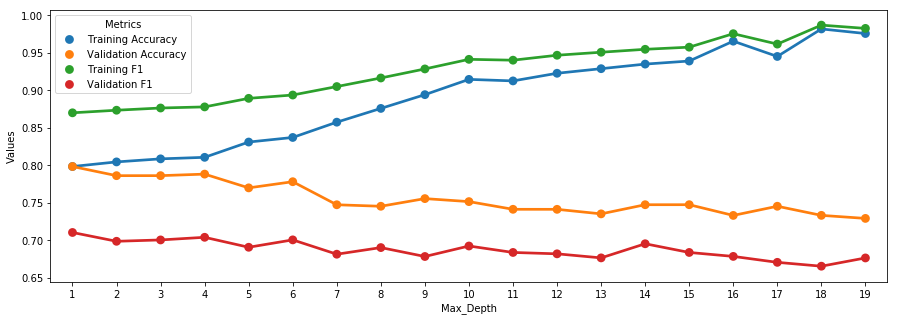

In [26]:
#  ix.    Calculate the accuracy of the model using the accuracy score function.
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(xaxis_train_data,yaxis_train_data)
    y_training_pred = tree_clf.predict(xaxis_train_data)

    training_acc = accuracy_score(yaxis_train_data,y_training_pred)
    train_f1 = f1_score(yaxis_train_data,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,xaxis_train_data,yaxis_train_data,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,xaxis_train_data,yaxis_train_data,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

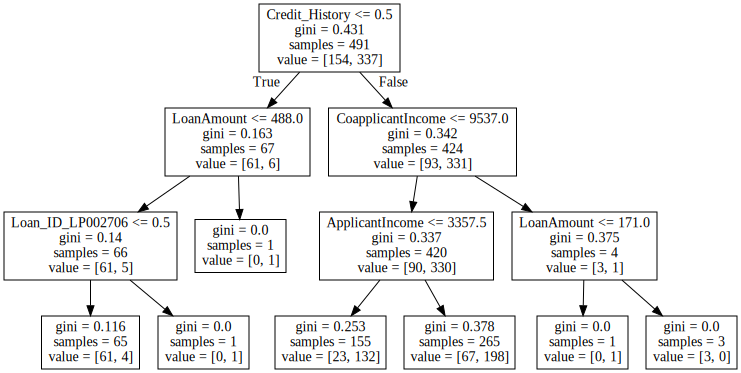

In [27]:
#  x.     Visualizing Decision Trees
tree_classifier = tree.DecisionTreeClassifier(max_depth = 3)
tree_classifier.fit(xaxis_train_data,yaxis_train_data)
dot_data = tree.export_graphviz(tree_classifier,feature_names = xaxis.columns.tolist())
graph = graphviz.Source(dot_data)
graph